# Analyse exploratoire des données issue de l'API d'Enedis

In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

In [2]:
## Import librairies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# Import du script pour recuperer les donnees
from scripts.int_api import get_data

df = get_data()

   consommation_profilee_ent_hta  soutirage_rte  temperature_reelle_lissee  \
0                      9842319.0   3.663986e+09                       10.3   
1                      9753744.0   3.508571e+09                       10.3   
2                     10097935.0   3.583818e+09                       10.3   
3                      9982813.0   3.555732e+09                       10.3   
4                     10188180.0   3.500023e+09                       10.3   

   consommation_telerelevee_btsup  consommation_telerelevee_residentielle  \
0                    3.837060e+09                             337762242.0   
1                    3.906590e+09                             341971621.0   
2                    3.947795e+09                             335499451.0   
3                    4.041599e+09                             340487958.0   
4                    4.050052e+09                             336589889.0   

   consommation_telerelevee_professionnelle  \
0                    

In [4]:
# Aperçu des données
df.head()

,consommation_profilee_ent_hta,soutirage_rte,temperature_reelle_lissee,consommation_telerelevee_btsup,consommation_telerelevee_residentielle,consommation_telerelevee_professionnelle,production_profilee_photovoltaique,pseudo_rayonnement,consommation_profilee_pro,production_photovoltaique,...,production_cogeneration,consommation_hta,production_telerelevee,injection_rte,horodate,production_totale,production_profilee,production_profilee_aut,consommation_totale,temperature_normale_lissee
0,9842319.0,3.663986e+09,10.3,3.837060e+09,337762242.0,13037945.0,35046.0,62,3.947912e+09,1928440.0,...,989877430.0,1.010819e+10,9.508071e+09,3.674132e+10,2025-03-28T22:45:00+00:00,9.511443e+09,3372466.0,1519595.0,3.914999e+10,0.0
1,9753744.0,3.508571e+09,10.3,3.906590e+09,341971621.0,13093172.0,31882.0,62,3.966919e+09,1966021.0,...,991393434.0,1.018816e+10,9.369338e+09,3.750912e+10,2025-03-28T22:30:00+00:00,9.372708e+09,3369302.0,1519595.0,3.985193e+10,9.6
2,10097935.0,3.583818e+09,10.3,3.947795e+09,335499451.0,13098268.0,29342.0,61,4.020695e+09,2091399.0,...,993430896.0,1.022499e+10,9.358892e+09,3.711432e+10,2025-03-28T22:15:00+00:00,9.362258e+09,3365869.0,1519595.0,3.944197e+10,0.0
3,9982813.0,3.555732e+09,10.3,4.041599e+09,340487958.0,13192752.0,36814.0,61,4.034090e+09,2159887.0,...,992977559.0,1.031350e+10,9.348450e+09,3.774551e+10,2025-03-28T22:00:00+00:00,9.351824e+09,3373341.0,1519595.0,4.002946e+10,9.6
4,10188180.0,3.500023e+09,10.3,4.050052e+09,336589889.0,12528562.0,57062.0,60,4.206722e+09,2200877.0,...,992589362.0,1.037750e+10,9.291646e+09,3.787243e+10,2025-03-28T21:45:00+00:00,9.295041e+09,3395747.0,1519595.0,4.015080e+10,0.0


In [5]:
# Info sur le dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 30 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   consommation_profilee_ent_hta             100 non-null    float64
 1   soutirage_rte                             100 non-null    float64
 2   temperature_reelle_lissee                 100 non-null    float64
 3   consommation_telerelevee_btsup            100 non-null    float64
 4   consommation_telerelevee_residentielle    100 non-null    float64
 5   consommation_telerelevee_professionnelle  100 non-null    float64
 6   production_profilee_photovoltaique        100 non-null    float64
 7   pseudo_rayonnement                        100 non-null    int64  
 8   consommation_profilee_pro                 100 non-null    float64
 9   production_photovoltaique                 100 non-null    float64
 10  pertes                                 

In [6]:
# Convertion des types de variables
df["horodate"] = pd.to_datetime(df["horodate"])
df["mois"] = df["mois"].astype(int)

## Statistiques descriptives

In [7]:
# Résumé statistique univariée
df.describe().T

,count,mean,std,min,25%,50%,75%,max
consommation_profilee_ent_hta,100.0,1.078710e+07,1.501672e+06,9.162374e+06,9.663237e+06,1.010334e+07,1.177388e+07,1.388286e+07
soutirage_rte,100.0,2.786125e+09,1.808211e+09,7.286307e+08,9.112672e+08,2.750885e+09,4.164717e+09,6.135158e+09
temperature_reelle_lissee,100.0,1.065600e+01,7.183483e-01,9.600000e+00,1.020000e+01,1.045000e+01,1.120000e+01,1.200000e+01
consommation_telerelevee_btsup,100.0,5.080831e+09,1.161555e+09,3.640881e+09,4.032567e+09,4.986211e+09,6.092492e+09,7.162095e+09
consommation_telerelevee_residentielle,100.0,2.882056e+08,4.607229e+07,2.188902e+08,2.417192e+08,2.935949e+08,3.286217e+08,3.698744e+08
consommation_telerelevee_professionnelle,100.0,1.206264e+07,2.052852e+06,9.375855e+06,1.037194e+07,1.187203e+07,1.311325e+07,1.788487e+07
production_profilee_photovoltaique,100.0,4.338378e+08,5.829079e+08,1.333100e+04,5.412550e+04,5.200584e+06,9.444629e+08,1.503552e+09
pseudo_rayonnement,100.0,5.482000e+01,1.442597e+01,3.300000e+01,4.100000e+01,5.450000e+01,6.500000e+01,8.000000e+01
consommation_profilee_pro,100.0,4.431411e+09,6.109160e+08,3.467256e+09,3.850241e+09,4.601945e+09,4.860792e+09,5.395566e+09
production_photovoltaique,100.0,3.382011e+09,4.424948e+09,4.253600e+05,7.124515e+05,6.395373e+07,7.598653e+09,1.119005e+10


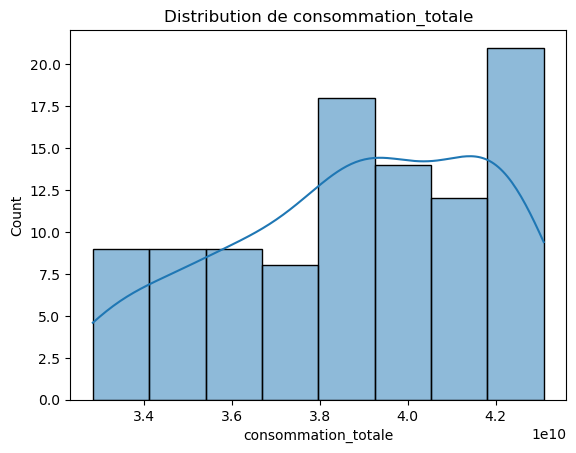

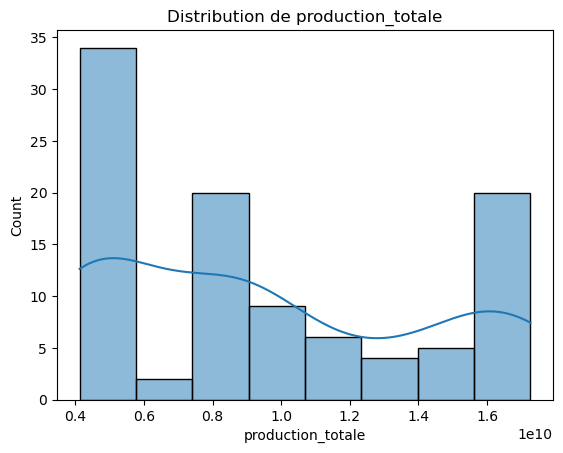

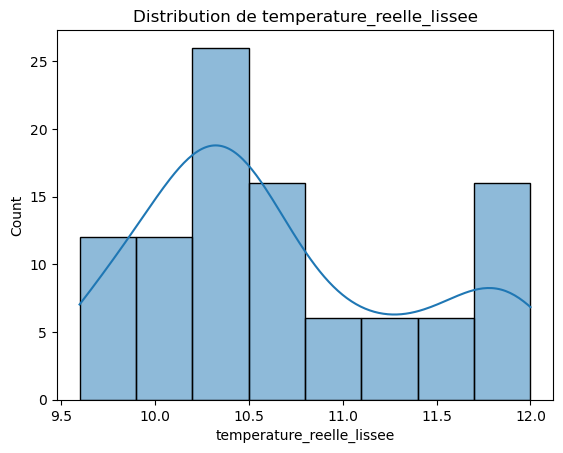

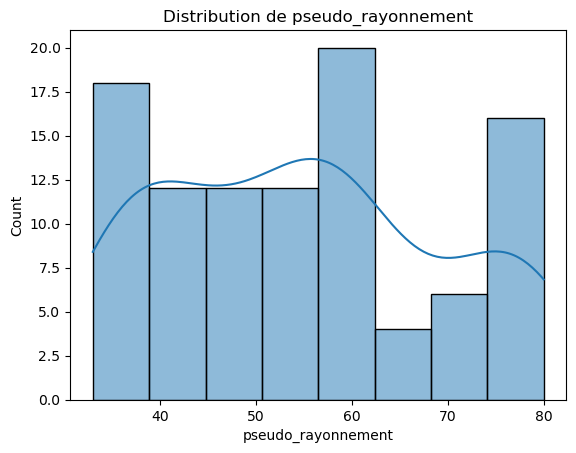

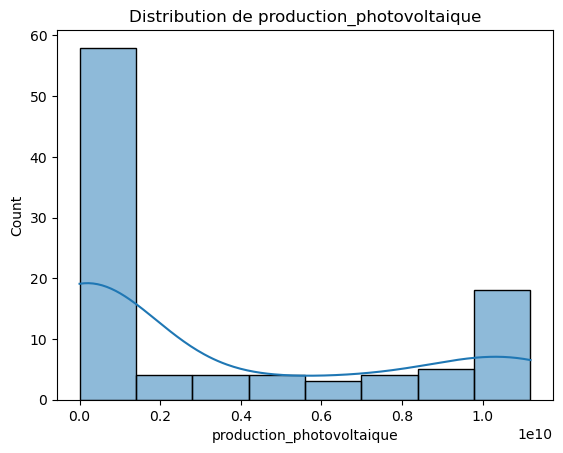

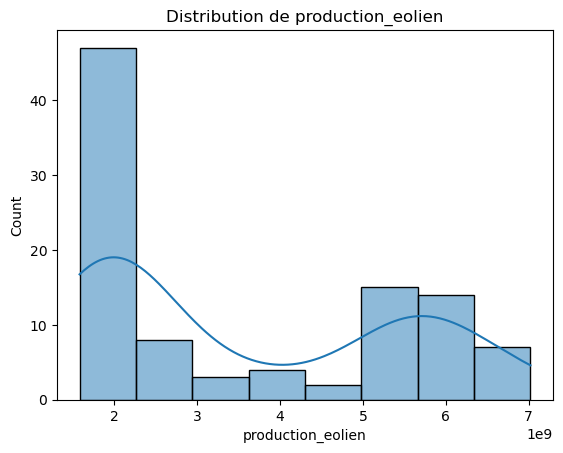

In [8]:
# Visualisation des colonnes d'intérêts
inter = [
    "consommation_totale", "production_totale", "temperature_reelle_lissee",
    "pseudo_rayonnement", "production_photovoltaique", "production_eolien"
]

for col in inter:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution de {col}")
    plt.show()

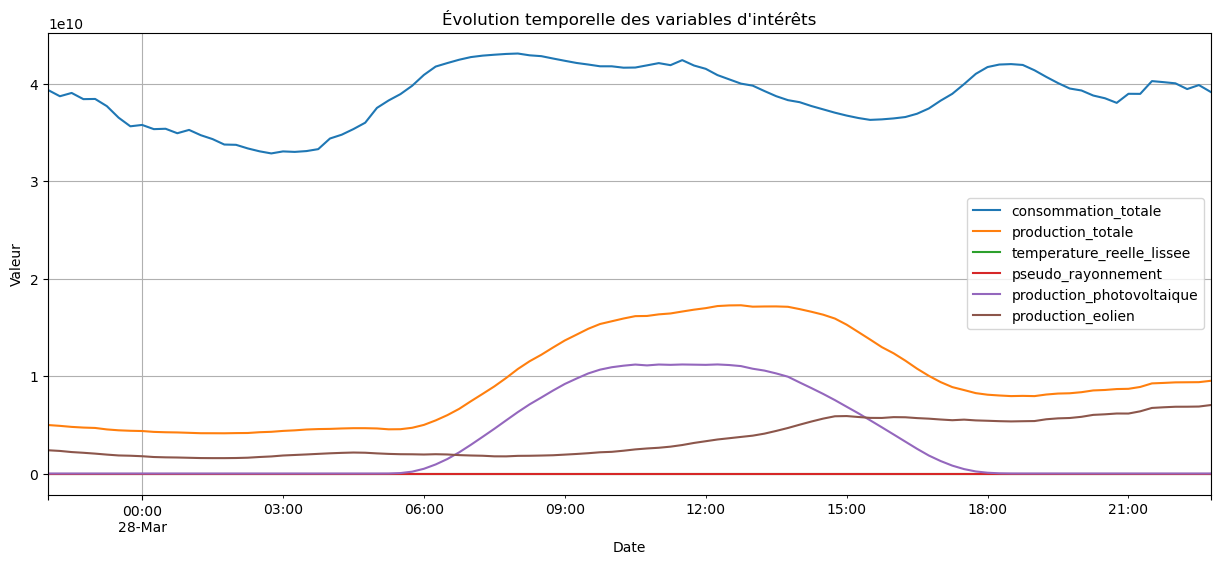

In [9]:
df.set_index("horodate")[inter].plot(figsize=(15, 6))
plt.title("Évolution temporelle des variables d'intérêts")
plt.xlabel("Date")
plt.ylabel("Valeur")
plt.grid(True)
plt.show()

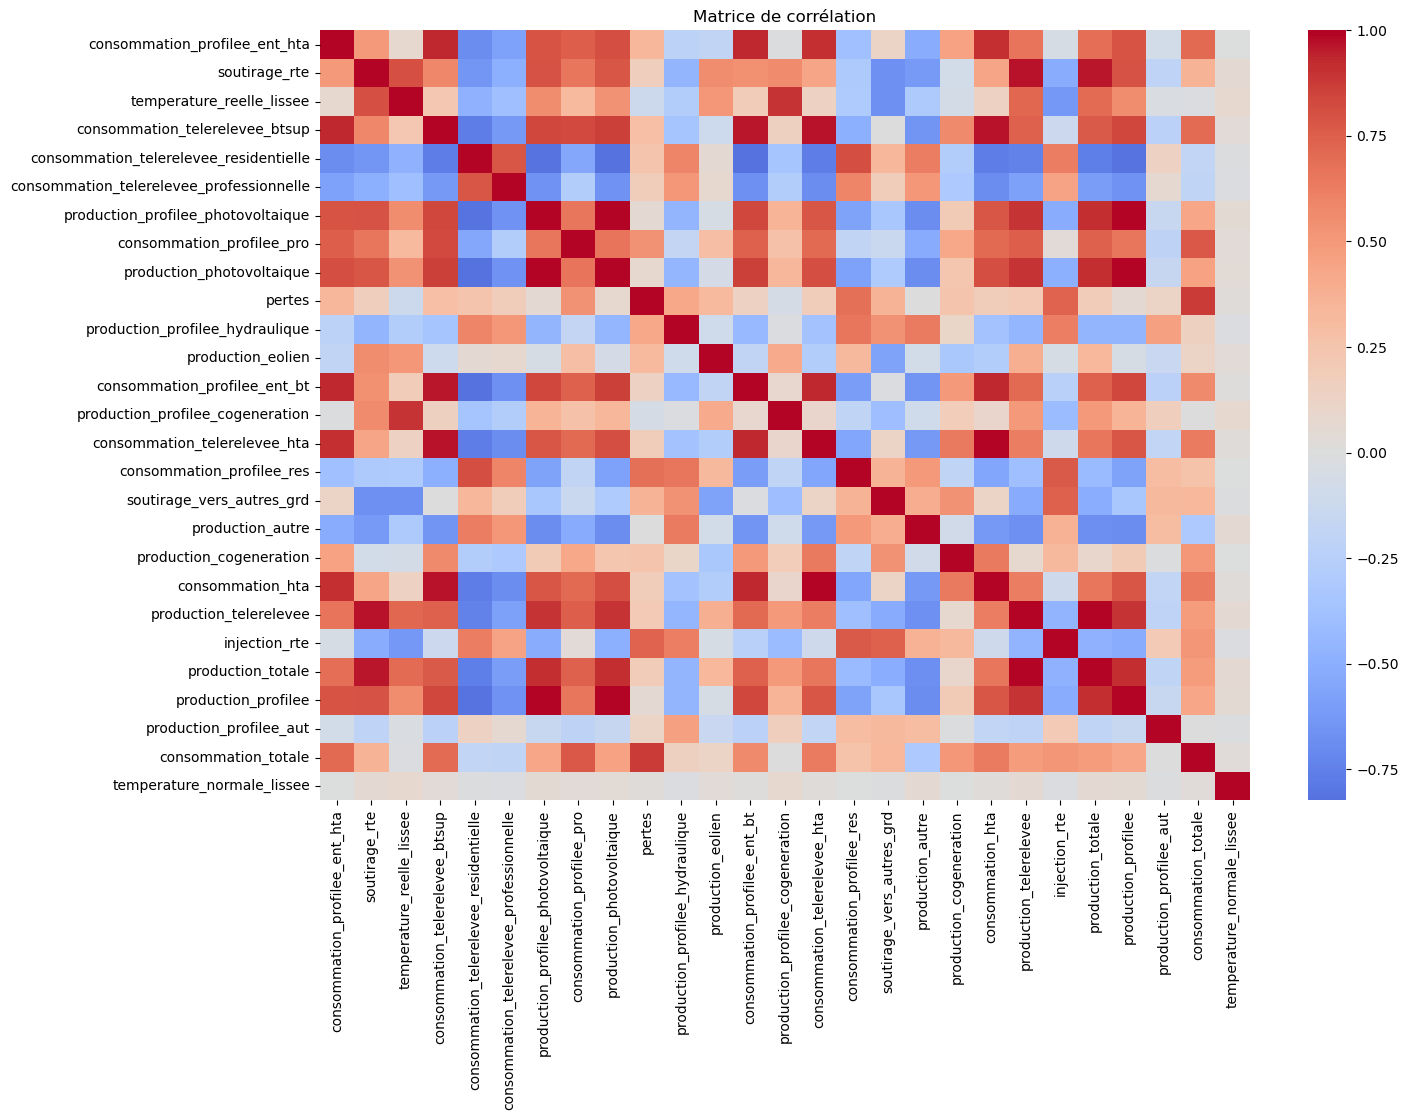

In [10]:
corr = df.select_dtypes(include=[float]).corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Matrice de corrélation")
plt.show()